# Capítulo 2 - Regressão Polinomial

## Nesse capítulo vamos estudar:

- O conceito de uma Regressão Linear Polinomial.

- Manipulação de dados usando um Pipeline.

## 1. O que é uma Regressão Polinomial?

A **Regressão Polinomial** é como a Regressão Linear comum, porém, usados os dados com suas formas polinomiais para melhor se ajustar aos dados e dimunir o erro médio em nossos modelos.

Por exemplo, suponha que temos a seguinte Função Linear:

# <center> $\hat{y} = x_0 . w_0 + b$ </center>

Essa função, acompanha uma linha reta, então adicionamos características polinomias à esses dados, para manipular essa linha de forma que ela acompanhe a relação entre os dados X e y sem restringir-la à uma reta. Por exemplo:

# <center> $\hat{y} = x_0 . w_0 + x_0² . w_1 + b$ </center>

Nesse exemplo, no lugar de uma linha reta, essa função nos retorna uma curva exponencial. Vamos ilustrar essa idéia abaixo.


In [1]:
## Primeiramente, vamos verificar nosso ambiente e fazer a importação das bibliotecas nescessárias.

# Vamos usar uma versao do Python ≥ 3.5
import sys
assert sys.version_info >= (3, 5)
sys.path.append("..")

# E uma versao da Scikit-Learn ≥0.20
import sklearn
assert sklearn.__version__ >= "0.20"

# Vamos importar Numpy para certos calculos matematicos e Pandas para analize e manipulação de dados.
import numpy as np
import pandas as pd

# Vamos definar a nossa random seed, para que os resultados sejam replicaveis.
np.random.seed(42)

# E finalmente, vamos importar a biblioteca MatplotLib para visualizar os dados.
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

mpl.style.use("seaborn-bright")
mpl.rc('figure', figsize=(15,5))
mpl.rc('axes', titlesize=20)
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rcParams['axes.facecolor'] = 'whitesmoke'
mpl.rcParams.update({"axes.grid" : True, "grid.color": "grey"})

### Nota: caso haja qualquer dúvida sempre Bibliotecas ou suas funções, as suas documentações estão disponíveis
### no arquivo README.txt. Você também pode usar a função "help(**insira a funcao aqui**)" para ter uma
### explicação detalhada dentro do notebook.

> Vamos importar novamente os dados habitacionais usados no Capítulo 2, ja que estamos familiarizados com esse conjunto.

In [2]:
import pandas as pd
house_prices = pd.read_csv("../datasets/house-prices/train.csv")

> Como objetivo de visualição, vamos de início, usar apenas a coluna de **Ano de Construção** como nosso vetor de características **X** e novamente a coluna **Valor de Venda** como nosso vetor **y**, qual queremos prever.

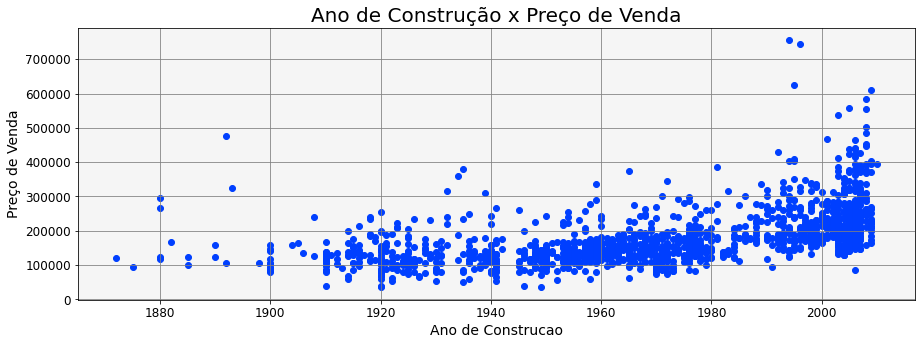

In [3]:
X = house_prices["YearBuilt"].copy()
y = house_prices["SalePrice"].copy()

fig1 = plt.figure(1)
plt.title("Ano de Construção x Preço de Venda")
plt.scatter(X, y)
plt.xlabel("Ano de Construcao")
plt.ylabel("Preço de Venda")
plt.show()

<br></br>
Como podemos observar, uma linha reta não se adaptaria tão bem aos dados como uma curva, nesse caso podemos adicionar características polinomiais ao nosso vetor **X** para que nossa Regressão Linear nos retorne uma curva polinomial.

# 2. Criando Nosso Modelo de Linha Reta

Como estamos usando apenas uma coluna, contendo dados quantitavos discretos e não há valores perdidos ou nulos, vamos apenas escalar nossos dados usando o método da padronização. Vamos criar uma funcão para separar os dados e padronizalos.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

def dividir_e_escalar(X, y, test_size=0.1):
    _X_train, _X_test, _y_train, _y_test = train_test_split(X, y, test_size=test_size)
    return scale(_X_train), scale(_X_test), scale(_y_train), scale(_y_test)

X_train, X_test, y_train, y_test = dividir_e_escalar(X, y)
print(f"Formatos de X: {X_train.shape, X_test.shape}, e y: {y_train.shape, y_test.shape}")

Formatos de X: ((1314,), (146,)), e y: ((1314,), (146,))


>Como nossos vetores estão em formatos de 1 dimensão(N, ), precisamos transformar nossos vetores X para vetores 2-dimensionais.

In [5]:
def expandir_dims(X1, X2):
    X1 = X1[:, np.newaxis]
    X2 = X2[:, np.newaxis]
    return X1, X2

X_train, X_test = expandir_dims(X_train, X_test)
print(f"Formatos de X: {X_train.shape, X_test.shape}, e y: {y_train.shape, y_test.shape}")

Formatos de X: ((1314, 1), (146, 1)), e y: ((1314,), (146,))


> Pronto, agora vamos criar e treinar nosso modelo
<br></br>

In [6]:
from models import LinearRegressionGD #Modelo usado no capítulo passado, contido no módulo models.py

gd_reta = LinearRegressionGD(learning_rate=0.001, max_iter=500, tol=1e-14)

#Treinando nosso modelo
gd_reta.fit(X_train, y_train)

MAE na iteração 0: 0.7289837447385544
MAE na iteração 100: 0.5958725797815742
MAE na iteração 200: 0.5958725797815742
MAE na iteração 300: 0.5958725797815742
MAE na iteração 400: 0.5958725797815742


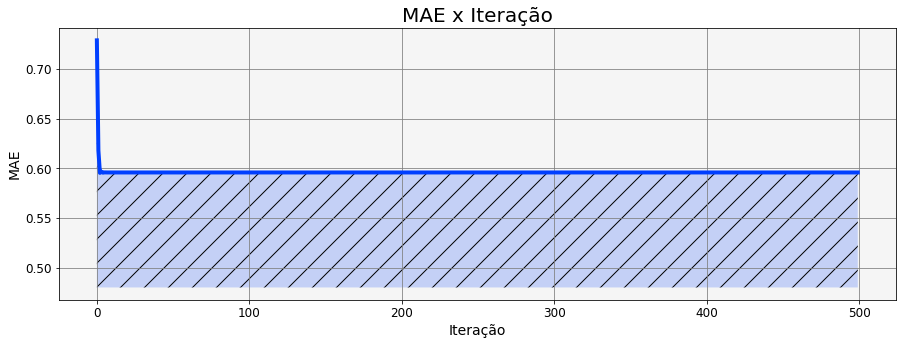

In [7]:
fig2 = plt.figure(2)
plt.title("MAE x Iteração", fontdict={"fontsize":20})
plt.plot(np.arange(500), gd_reta.scores_log, lw=4)
plt.fill_between(np.arange(500), 0.48, gd_reta.scores_log, hatch="/", alpha=0.2)
plt.xlabel("Iteração")
plt.ylabel("MAE")
plt.show()

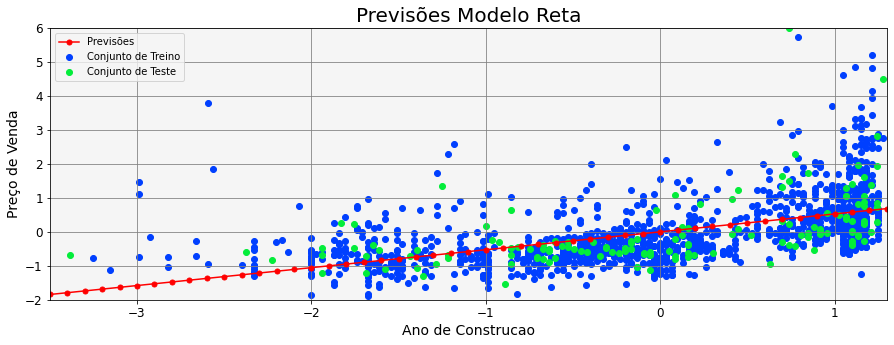

In [8]:
xlin = np.arange(-4, 2, 0.1).reshape(-1,1)
gd_reta_ylin = gd_reta.predict(xlin)

fig = plt.figure(3)
plt.title("Previsões Modelo Reta")
plt.scatter(X_train, y_train, label="Conjunto de Treino")
plt.scatter(X_test, y_test, label="Conjunto de Teste")
plt.plot(xlin, gd_reta_ylin, "r-", marker='o', ms=5, label="Previsões")
plt.legend()
plt.xlabel("Ano de Construcao")
plt.ylabel("Preço de Venda")
plt.axis([-3.5, 1.3, -2, 6])
plt.show()

In [9]:
from scores import pontuacao

#Calculando as previsões com o Modelo de Linha Reta
gd_reta_pred = gd_reta.predict(X_test)

#Calculando suas Pontuaões
pontuacoes = pontuacao(y_test, gd_reta_pred, "Modelo Linha Reta")
pontuacoes

,Modelo,R²,MAE,MAPE,MSE,RMSE
0,Modelo Linha Reta,0.264,0.575,2.696,0.736,0.858


# 3. Criando Nosso Modelo Polinomial

Vamos agora adicionar características polinomiais ao nosso conjunto de características para poder modelar nossa linha de predição e avaliar seu desempenho.

In [11]:
#Adicionando Características Polonomiais
#Adicionado uma coluna com Ano de Construção elavado ao Quadrado

def quadratica(x):
    return np.c_[x, x**2]

X_train_quad = quadratica(X_train)
X_test_quad = quadratica(X_test)

> Podemos treinar nosso modelo com esse novo conjunto.

In [12]:
#Criando um novo modelo de Regressão Linear com Gradiente Descendente
gd_quad = LinearRegressionGD(learning_rate=0.0001)

#Treinando o novo modelo
gd_quad.fit(X_train_quad, y_train)

MAE na iteração 0: 0.7289837447385544
MAE na iteração 100: 0.5539182470432351
MAE na iteração 200: 0.5537512294809469
MAE na iteração 300: 0.5537501675811203
MAE na iteração 400: 0.5537501600082178
Tolerancia atingida na iteracao:  487


>Vamos criar um gráfico para comparar as duas previsões.

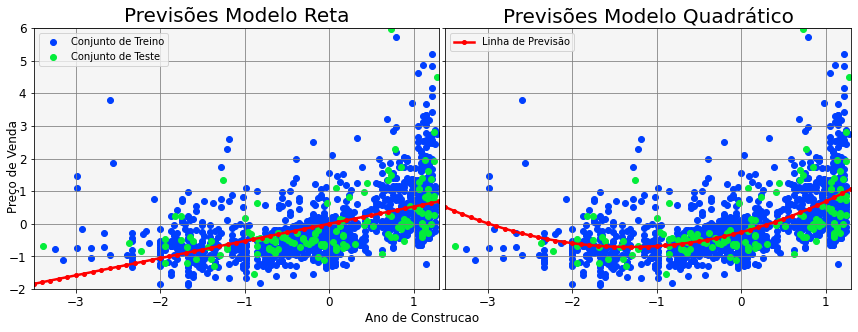

In [14]:
#Criando conjunto linear polinomial
xlin_quad = quadratica(xlin)
#Obtendo suas previsões
gd_quad_ylin = gd_quad.predict(xlin_quad)


#Plotando o gráfico
fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, sharey=True, figsize=(12,4.5), num=4)

ax1.set_title("Previsões Modelo Reta")
ax1.scatter(X_train, y_train, label="Conjunto de Treino")
ax1.scatter(X_test, y_test, label="Conjunto de Teste")
ax1.plot(xlin, gd_reta_ylin, "r-", lw=2.5, marker="o", ms=4)
ax1.legend()

ax2.set_title("Previsões Modelo Quadrático")
ax2.scatter(X_train, y_train)
ax2.scatter(X_test, y_test)
ax2.plot(xlin, gd_quad_ylin, "r-", marker="o", ms=4, lw=2.5, label="Linha de Previsão")
ax2.legend()

fig.supxlabel("Ano de Construcao")
fig.supylabel("Preço de Venda")

plt.axis([-3.5, 1.3, -2, 6])
plt.tight_layout(pad=0.3)

>Como podemos perceber, nosso modelo criou uma linha de previsão curva, como esperado para um conjunto polinomial. Com isso, nosso modelo teve mais liberdade para poder melhor representar a relação entre os nossos dados.
<br></br>Agora vamos analizar sua pontuação e verificar se essa melhoria se traduz em suas métricas.

In [15]:
#Computando as previsões para o conjunto de teste
gd_quad_pred = gd_quad.predict(X_test_quad)

pontuacoes = pontuacoes.append(pontuacao(y_test, gd_quad_pred, "Modelo Quadrático"))
pontuacoes

,Modelo,R²,MAE,MAPE,MSE,RMSE
0,Modelo Linha Reta,0.264,0.575,2.696,0.736,0.858
0,Modelo Quadrático,0.313,0.528,3.211,0.687,0.829


<br>
Como podemos notar, aumentando o grau de liberdade do nosso modelo treinando-o com dados polinomiais, melhora seu desempenho nesse caso e isso é refletido nas métricas. Agora vamos dar um passo além e adicionar mais características ao nosso conjunto X e suas relações polinomiais.

___ 
___
___
___
___


# 4. Criando um Modelo Multivariável Polinomial

Vamos analizar nosso dataset e escolher caracteŕisticas que modem ajudar o nosso modelo a obter melhores previsões.

In [ ]:
house_prices.info()

> Vamos criar um novo conjunto de caracteŕisticas, adicionando "Área Habitável", "Área do Lote" e "Área Frontal do Lote".

In [ ]:
X = house_prices[["GrLivArea", "YearBuilt", "LotArea", "LotFrontage"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

> Vamos vizualizar uma parte desse conjunto com relação ao Preço de Venda.

In [ ]:
from pylab import *
%matplotlib notebook

#Criando uma projeção 3D
fig = plt.figure(5, figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
plt.title("Área Habitável x Ano de Construção x Preço de Venda", fontdict={"fontsize":16})

#Criando um Mapa de Calor para melhor vizualização
cmap = cm.ScalarMappable(cmap=cm.cool)
cmap.set_array(y)
fig.colorbar(cmap, shrink=0.5, pad=0.1)

#Criando o gráfico 3-dimensional
ax.scatter(house_prices["GrLivArea"], house_prices["YearBuilt"], y, c=cm.cool(y/max(y)))
                                                                            

#Adicionando legendas aos eixos
ax.set_xlabel("Área Habitável", labelpad=6, style="italic")
ax.set_ylabel("Ano de Contrução", labelpad=6, style="italic")
ax.set_zlabel("Preço de Venda", labelpad=6, style="italic")

#Formatando valores do eixo z (Preco de venda)
fmt = lambda x, pos:'{:.0f}e5'.format((x/100000), pos) if x>0 else 0
ax.zaxis.set_major_formatter(mpl.ticker.FuncFormatter(fmt))

#Plotando um grafico 3-dimensional interativo, clique a arraste o cursor no gráfico para alterar a visualização
plt.show()

# Construindo uma Pipeline

## 1. O que  é uma Pipeline?

Traduzindo do inglês, **Pipeline** significa encanamento, que é uma boa maneira de representar esse processo. Basicamente, **Pipeline** é um conjunto de etapas de transformação de dados, onde cada etapa recebe uma função qualquer. Como no sentido literal, os dados vão seguir essas etapas como uma tubulação, até chegar à etapa final, onde encaixamos nosso modelo de aprendizado de máquina. 

## 2. Por que usar uma Pipeline?

Pipelines automotizam os processos de transformação de dados, isso torna mais eficiente nosso trabalho de criação de modelos, nos oferece a liberdade de trabalhar com um fluxo de dados novos constante, além de outras aspectos que veremos ao decorrer dos capítulos.

## 3.Comos criamos uma Pipeline?

Podemos criar uma Pipeline com uma função que recebe outras funções, ou para agilizar nosso trabalho, podemos importar a classe "pipeline.Pipeline" da biblioteca "sklearn".

Então, criamos uma instancia do nossa Pipeline com os passos de transformação que escolhemos. No nosso caso, vamos criar as seguintes etapas:

1. Nossos dados passam por uma função **Simple Imputer**, que serve para atribuir valores onde há valores nulos.
2. Após atribuir valores para valores nulos, os dados são padronizados com a função **Standard Scaler**.
3. Com os dados completos e padronizados, adicionamos características polinomiais aos nosso conjunto usando a classe da Scikit-Learn **Polynomial Features**.
4. E finalmente, os dados seguem para um modelo de Regressão de Gradiente Descendente, nesso caso podemos usar tanto a nossa classe quanto a classe própria da Scikit-Learn **SGD Regressor**, para poder computar os pesos e gerar nossas previsões.

Ao criar uma Pipeline, usamos a instância da mesma no lugar

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import SGDRegressor

pipeline = Pipeline([('simple_imputer', SimpleImputer()),                   #1
                     ('stadard_scaler', StandardScaler()),                  #2
                     ('polynomial_features', PolynomialFeatures(degree=2)), #3
                     ('regressor', SGDRegressor(                            #4
                         learning_rate="constant",
                         eta0=0.00001,
                         max_iter=3000,
                         verbose="1",
                         random_state=42))])

Após criar a nossa Pipeline, ainda há mais um passo que devemos seguir antes de treinar nosso modelo.

A Pipeline que criamos transforma apenas o **Vetor de Características(X)**, e precisamos também escalar nosso **Vetor de Alvos(y)** separadamente. Por isso, o último passo antes de treinar nosso modelo é automatizar a padronização dos nosso **Vetor de Alvos** paralelamente à nossa Pipeline. Para esse objetivo, vamos usar mais uma ferramenta da biblioteca Scikit-Learn chamada de ***Transformed Target Regressor***, que nos ajuda a escalar nosso **Vetor de Alvos** independentemente das transformações da Pipeline. Para usar essa ferramenta precisamos criar uma instância da classe **Transformed Target Regressor**, onde ela recebe os seguintes parâmetros:

- **regressor**: onde passamos nosso objeto da Pipeline criada.
- **transformer**: onde atribuímos qual a classe de transformador que queremos utilizar no nosso **Vetor de Alvos**, nesso caso, queremos padronizar usando a classe transformadora **Standard Scaler**.

O objeto criado será nosso modelo final, onde poderemos usar nossas funções de treinamento e previsão, como em uma classe comum de um regressor.
<br></br>

In [ ]:
from sklearn.compose import TransformedTargetRegressor 

#Criando a o modelo final
model = TransformedTargetRegressor(regressor=pipeline, transformer=StandardScaler()) 

#Treinando nosso modelo
model.fit(X_train, y_train)

> Pronto, modelo totalmente automatizado e criado, agora podemos fazer as previsões e avaliar a sua pontuação.

In [ ]:
#Fazendo as previssões referentes ao conjunto teste
model_pred = model.predict(X_test)

<div class="alert alert-block alert-warning">
    <h3>Atenção!</h3>
</div>

> Como criamos uma Pipeline para automatizar as transformações dos nossos dados, os vetores originais não foram efetados, pois a Pipeline cria novas instâncias para os vetores passados para não alterar os vetores originais.
<br></br>Outro ponto importante é que, ao realizar previsões com o nosso modelo final, o mesmo nos retorna a forma não padronizada do **Vetor de Previsões**. Ou seja, como avaliamos até agora ambos os modelos anteriores com seus vetores padronizados, precisamos padronizar ambos os vetores do modelo final **y_test** e **model_pred**, ou seja, o **Vetor de Alvos - Teste** e o **Vetor de Previsões - Teste**, antes de calcular a pontuação. 

In [ ]:
#Vamos usamos _p para indicar que os vetores estão padronizados
y_test_p = scale(y_test.copy()) 
model_pred_p = scale(model_pred.copy())

#Agora podemos computar e exibir suas pontuações ao lados das pontuações dos modelos anteriores

pontuacoes = pontuacoes.append(pontuacao(y_test_p, model_pred_p, "Modelo Multivariável"))
pontuacoes


<div class="alert alert-block alert-success">
<h1>Parabéns!</h1> <h3>Você completou o Capítulo 3. Você está a um passo a menos de completar: <b>Ensinando Máquinas - Do Zero a Redes Neurais</b></h3>
</div>